# Import Library

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Read Dataset

In [2]:
studentInfo_df     = pd.read_csv('studentInfo.csv')
assessments_df     = pd.read_csv('assessments.csv')
studAssessments_df = pd.read_csv('studentAssessment.csv')
studentVle_df      = pd.read_csv('studentVle.csv')
vle_df             = pd.read_csv('vle.csv')

studentInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [3]:
studentInfo_df[1:50]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass
10,AAA,2013J,57506,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Pass


In [4]:
studentInfo_df.shape

(32593, 12)

In [5]:
vle_df[~vle_df["week_from"].isna()]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


In [6]:
avg_per_site = studentVle_df.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.info()
avg_per_site.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960496 entries, 0 to 1960495
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id_student         int64  
 1   id_site            int64  
 2   code_module        object 
 3   code_presentation  object 
 4   date               float64
 5   sum_click          float64
dtypes: float64(2), int64(2), object(2)
memory usage: 89.7+ MB


,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [7]:
avg_per_student = avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
avg_per_student.info()
avg_per_student.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29228 entries, 0 to 29227
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_student         29228 non-null  int64  
 1   code_module        29228 non-null  object 
 2   code_presentation  29228 non-null  object 
 3   date               29228 non-null  float64
 4   sum_click          29228 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


In [8]:
final_df = pd.merge(studentInfo_df, avg_per_student, how="inner", on=["id_student","code_module","code_presentation"])

final_df.drop(["id_student","code_module","code_presentation"], axis = 1, inplace = True)

final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                29228 non-null  object 
 1   region                29228 non-null  object 
 2   highest_education     29228 non-null  object 
 3   imd_band              28174 non-null  object 
 4   age_band              29228 non-null  object 
 5   num_of_prev_attempts  29228 non-null  int64  
 6   studied_credits       29228 non-null  int64  
 7   disability            29228 non-null  object 
 8   final_result          29228 non-null  object 
 9   date                  29228 non-null  float64
 10  sum_click             29228 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.7+ MB


,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,111.739069,4.231515
1,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,92.532356,3.541379
2,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.571795,3.588112
3,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,99.678124,3.658979
4,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,99.220225,2.821116


In [9]:
final_df[1:50]

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
1,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,92.532356,3.541379
2,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.571795,3.588112
3,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,99.678124,3.658979
4,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,99.220225,2.821116
5,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,127.902446,3.490186
6,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass,104.780512,4.737711
7,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,119.867309,2.781419
8,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass,120.155418,3.514857
9,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,83.349293,4.806771
10,M,South Region,Lower Than A Level,70-80%,35-55,0,60,N,Pass,124.113615,3.497955


In [10]:
x =final_df["final_result"] == "Withdrawn"

In [11]:
x.head()

0    False
1    False
2     True
3    False
4    False
Name: final_result, dtype: bool

In [12]:
final_df.shape

(29228, 11)

In [13]:
final_df.describe()

,num_of_prev_attempts,studied_credits,date,sum_click
count,29228.000000,29228.000000,29228.000000,29228.000000
mean,0.158512,77.987204,72.265376,2.575613
std,0.472554,39.466858,45.275393,1.064536
min,0.000000,30.000000,-25.000000,1.000000
25%,0.000000,60.000000,29.582484,1.758813
50%,0.000000,60.000000,83.014196,2.324867
75%,0.000000,90.000000,106.489264,3.205855
max,6.000000,630.000000,239.947024,28.440018


In [14]:
final_df.isnull().sum()

gender                     0
region                     0
highest_education          0
imd_band                1054
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
date                       0
sum_click                  0
dtype: int64

Handling Missing Value

In [15]:
mode = final_df['imd_band'].mode()
mode

0    20-30%
dtype: object

In [16]:
final_df['imd_band'] = final_df['imd_band'].fillna(str(mode))

In [17]:
#final_df.dropna(inplace = True)

In [18]:
final_df.isnull().sum()

gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
date                    0
sum_click               0
dtype: int64

In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                29228 non-null  object 
 1   region                29228 non-null  object 
 2   highest_education     29228 non-null  object 
 3   imd_band              29228 non-null  object 
 4   age_band              29228 non-null  object 
 5   num_of_prev_attempts  29228 non-null  int64  
 6   studied_credits       29228 non-null  int64  
 7   disability            29228 non-null  object 
 8   final_result          29228 non-null  object 
 9   date                  29228 non-null  float64
 10  sum_click             29228 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.7+ MB


In [20]:
final_df.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,111.739069,4.231515
1,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,92.532356,3.541379
2,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.571795,3.588112
3,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,99.678124,3.658979
4,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,99.220225,2.821116


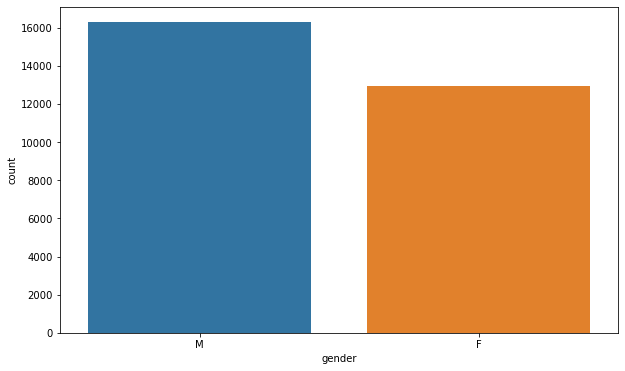

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(x = final_df['gender']);

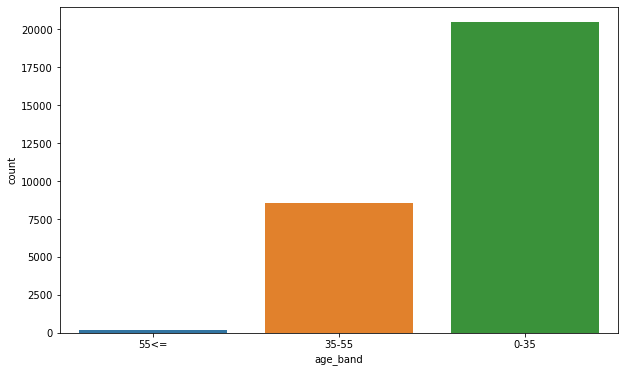

In [22]:
# This chart shows the age group of the bands
plt.figure(figsize = (10,6))
sns.countplot(x = final_df['age_band']);

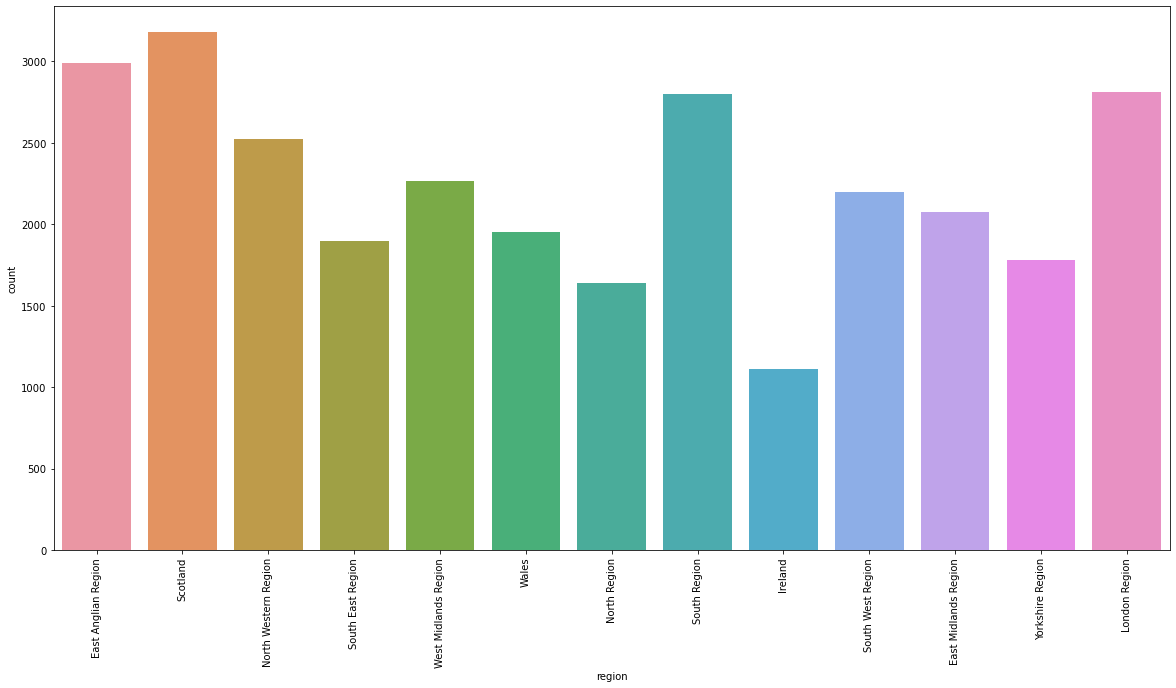

In [23]:
plt.figure(figsize = (20,10))
sns.countplot(x = final_df['region'])
plt.xticks(rotation = 90);

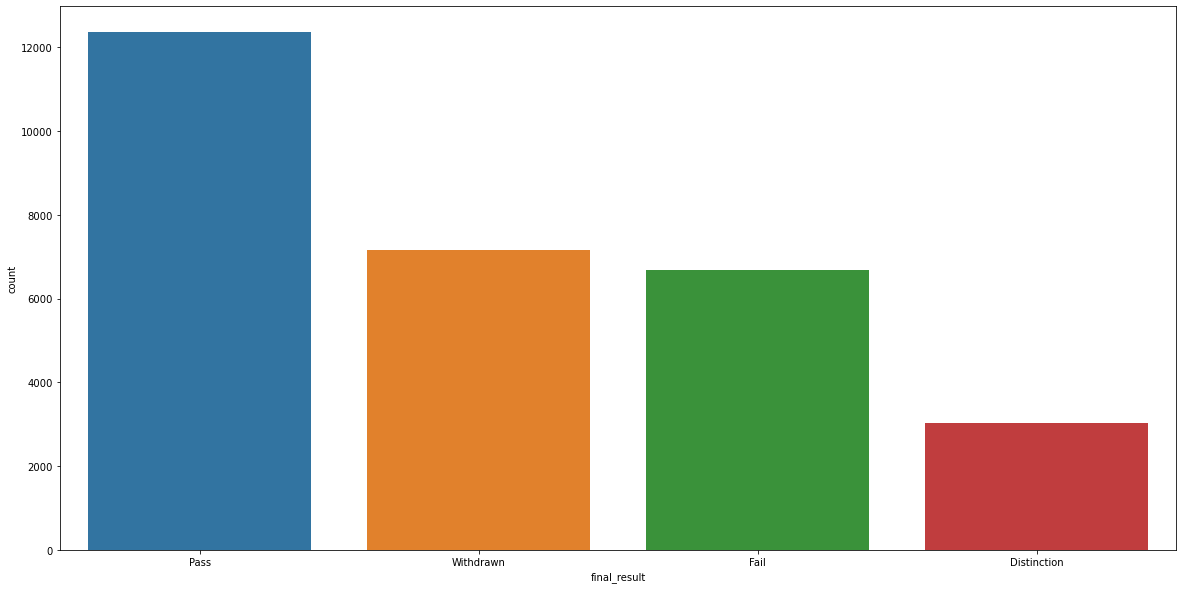

In [24]:
plt.figure(figsize = (20,10))
sns.countplot(data=final_df, x="final_result");

In [25]:
final_df["final_result"] = final_df["final_result"].replace("Withdrawn", "Fail")
final_df["final_result"] = final_df["final_result"].replace("Distinction", "Pass")

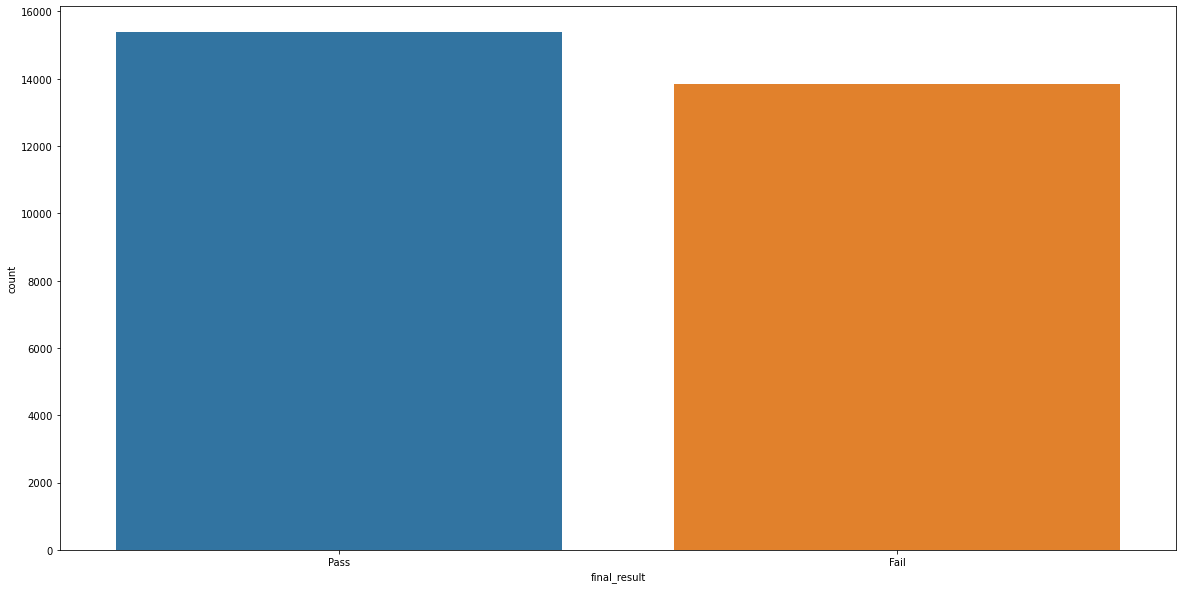

In [26]:
plt.figure(figsize = (20,10))
sns.countplot(data=final_df, x="final_result");

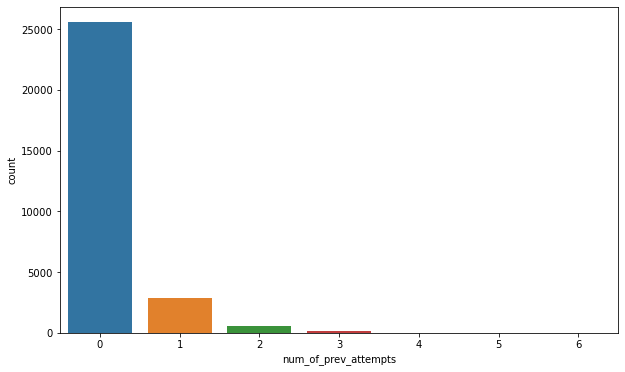

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(x = final_df['num_of_prev_attempts']);

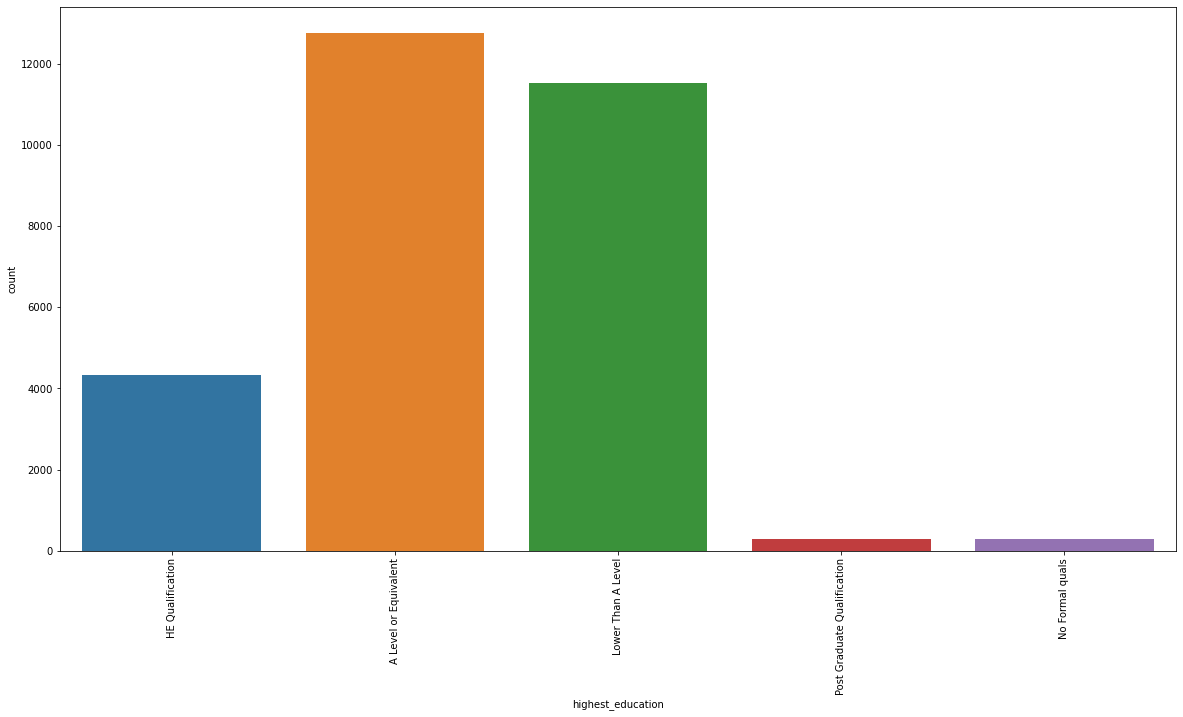

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(x = final_df['highest_education'])
plt.xticks(rotation = 90);

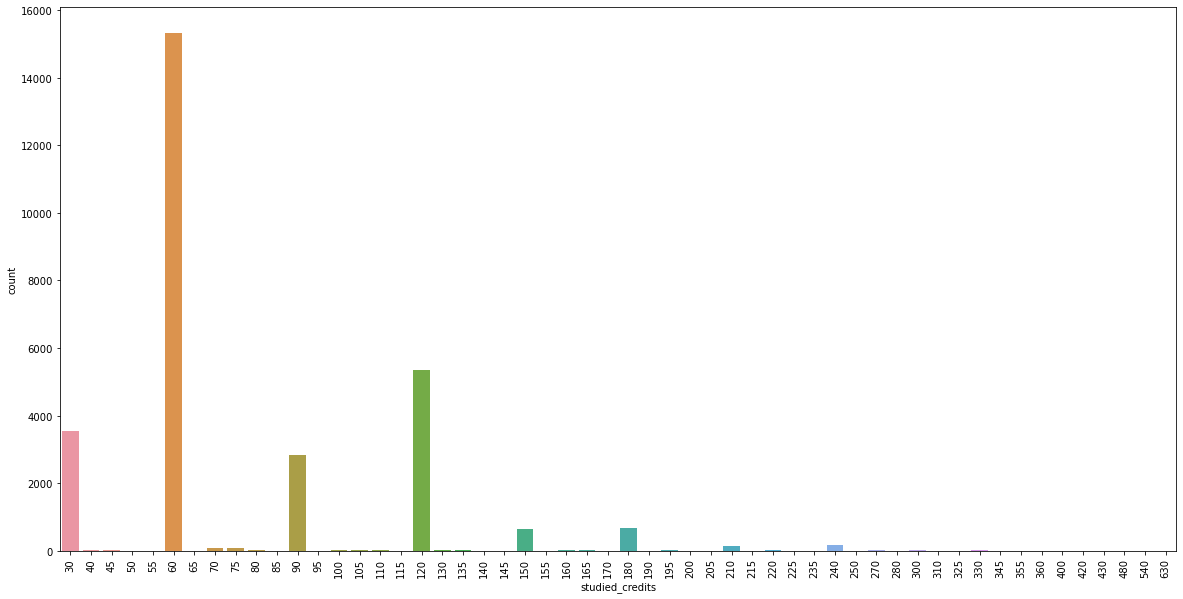

In [29]:
plt.figure(figsize = (20,10))
sns.countplot(x = final_df['studied_credits'])
plt.xticks(rotation = 90);

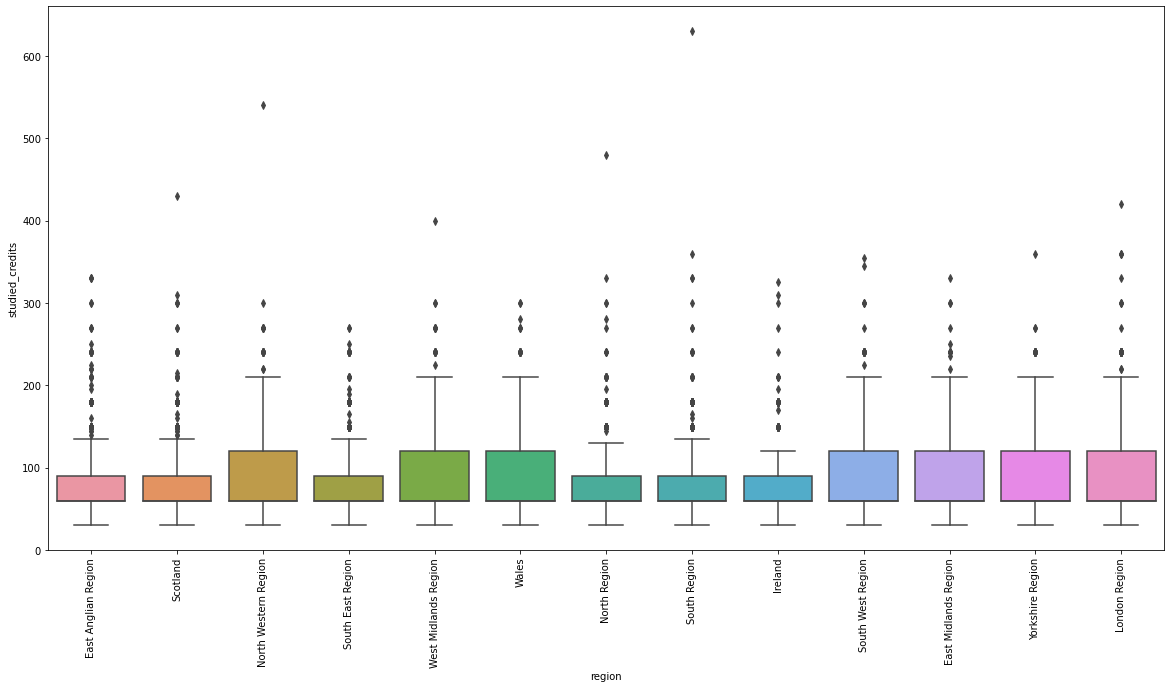

In [30]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'region', y = 'studied_credits', data = final_df)
plt.xticks(rotation = 90);

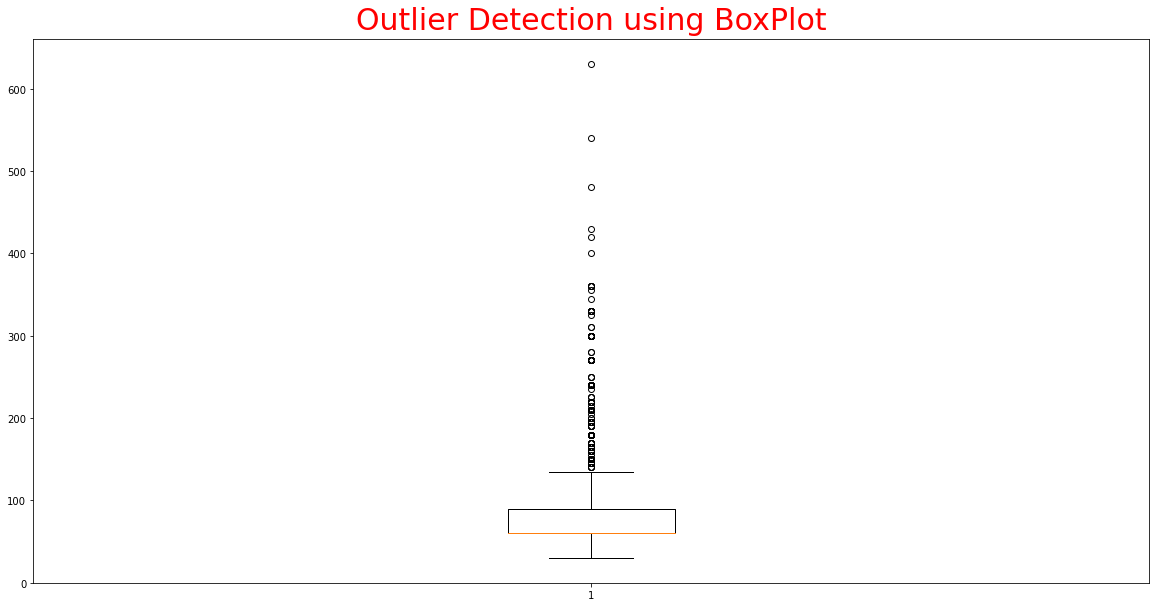

In [31]:
plt.figure(figsize = (20,10))
plt.boxplot(final_df["studied_credits"])
plt.title("Outlier Detection using BoxPlot", color = 'r',size = 30, pad = 10);

In [32]:
q1 = final_df["studied_credits"].quantile(0.25)
q2 = final_df["studied_credits"].quantile(0.75)
(q1,q2)

(60.0, 90.0)

In [33]:
IQR = q2 - q1
IQR

30.0

In [34]:
lower_limit = q1 - 1.5*IQR
upper_limit = q2 + 1.5*IQR
(lower_limit, upper_limit)

(15.0, 135.0)

In [35]:
final_df[(final_df["studied_credits"] < lower_limit) | (final_df["studied_credits"] > upper_limit)]

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,111.739069,4.231515
18,M,East Anglian Region,A Level or Equivalent,10-20,35-55,0,150,N,Fail,87.003727,1.496894
40,F,East Midlands Region,A Level or Equivalent,40-50%,0-35,0,180,N,Pass,96.266683,3.669780
44,F,East Anglian Region,Lower Than A Level,20-30%,0-35,0,180,N,Fail,15.805556,2.614583
47,F,East Midlands Region,A Level or Equivalent,30-40%,0-35,0,240,N,Pass,108.966471,2.815723
...,...,...,...,...,...,...,...,...,...,...,...
27879,F,South East Region,A Level or Equivalent,60-70%,0-35,0,240,Y,Pass,99.049328,2.734592
27915,F,North Western Region,A Level or Equivalent,10-20,35-55,0,150,N,Fail,71.162857,1.951905
27965,M,North Region,Lower Than A Level,10-20,0-35,0,150,N,Fail,-5.000000,1.000000
28157,F,South Region,Lower Than A Level,50-60%,35-55,0,150,N,Pass,135.646171,2.140015


In [36]:
final_df = final_df[(final_df["studied_credits"] > lower_limit) & (final_df["studied_credits"] < upper_limit)]

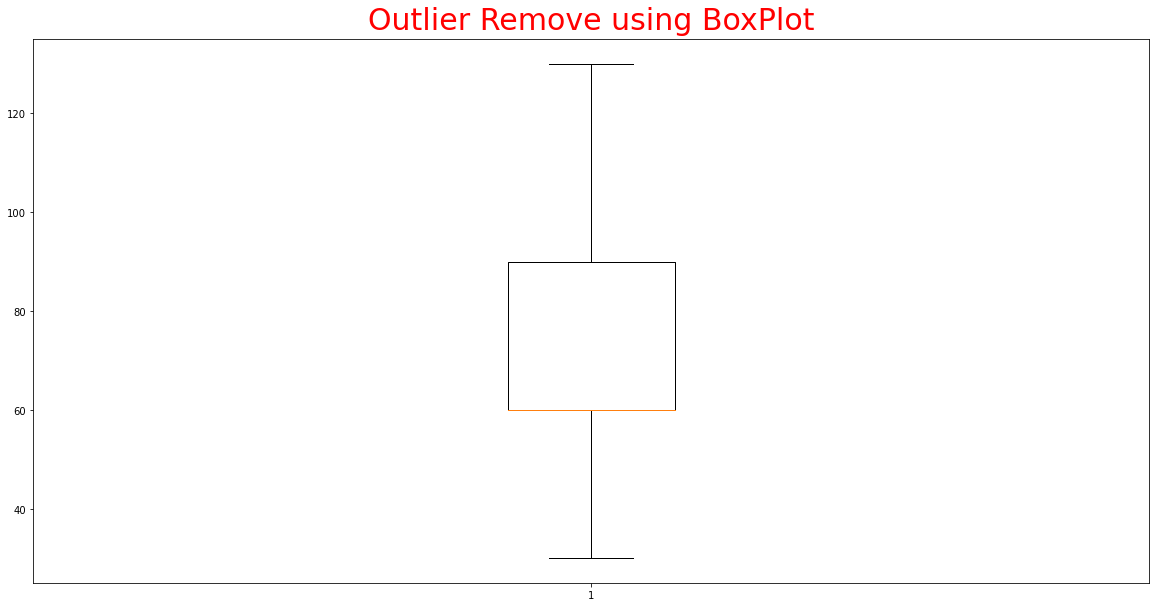

In [37]:
plt.figure(figsize = (20,10))
plt.boxplot(final_df["studied_credits"])
plt.title("Outlier Remove using BoxPlot", color = 'r',size = 30, pad = 10);

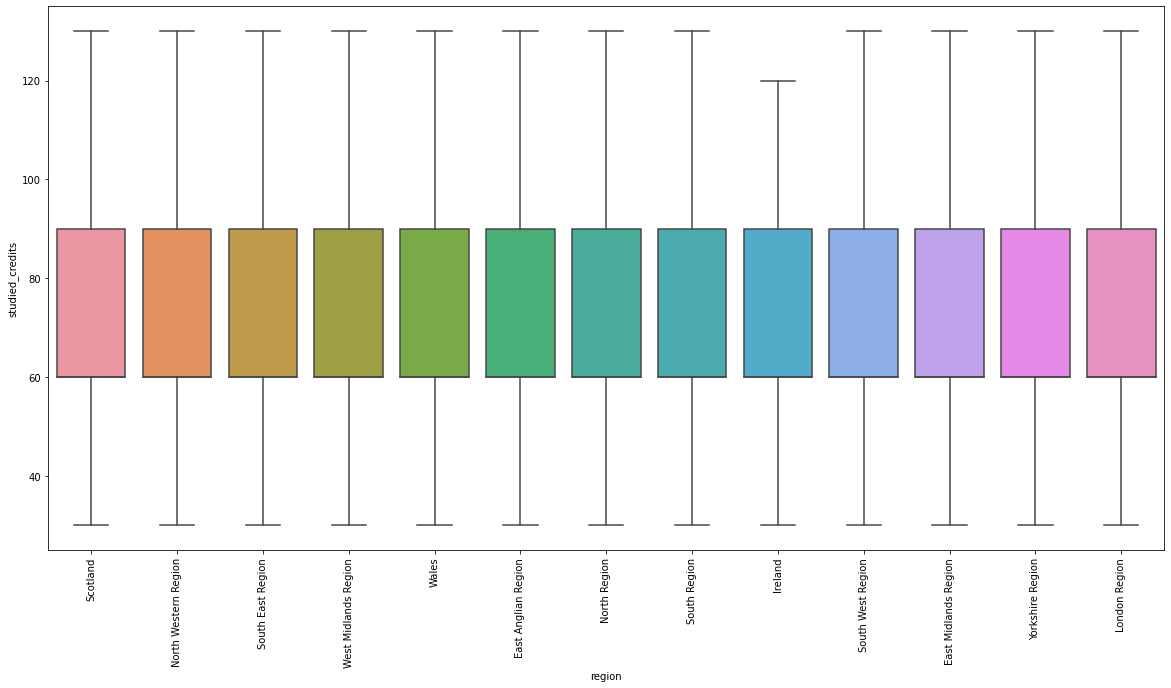

In [38]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'region', y = 'studied_credits', data = final_df)
plt.xticks(rotation = 90);

In [39]:
cols = final_df.columns
cols

Index(['gender', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'date', 'sum_click'],
      dtype='object')

In [40]:

from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['gender', 'region', 'highest_education', 
                  'imd_band', 'age_band', 'disability', 
                  'final_result']
# Encode categorical data
final_df[cols_to_encode] = final_df[cols_to_encode].apply(LabelEncoder().fit_transform)

final_df.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
1,0,6,1,3,1,0,60,0,1,92.532356,3.541379
2,0,5,0,4,1,0,60,1,0,2.571795,3.588112
3,0,7,0,6,1,0,60,0,1,99.678124,3.658979
4,0,11,2,6,0,0,60,0,1,99.220225,2.821116
5,1,10,0,9,1,0,60,0,1,127.902446,3.490186


In [41]:
train_stats = final_df.describe()
train_stats.pop("final_result")
train_stats.pop("studied_credits")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
gender,27437.0,0.557131,0.496734,0.0,0.000000,1.000000,1.000000,1.000000
region,27437.0,5.891388,3.672589,0.0,3.000000,6.000000,9.000000,12.000000
highest_education,27437.0,1.008018,0.982094,0.0,0.000000,1.000000,2.000000,4.000000
imd_band,27437.0,5.104603,2.931756,0.0,3.000000,5.000000,8.000000,10.000000
age_band,27437.0,0.310311,0.477898,0.0,0.000000,0.000000,1.000000,2.000000
num_of_prev_attempts,27437.0,0.142435,0.449578,0.0,0.000000,0.000000,0.000000,6.000000
disability,27437.0,0.093122,0.290609,0.0,0.000000,0.000000,0.000000,1.000000
date,27437.0,73.262138,44.970636,-25.0,31.119697,83.928543,106.877625,239.947024
sum_click,27437.0,2.582897,1.067812,1.0,1.763565,2.333672,3.211815,28.440018


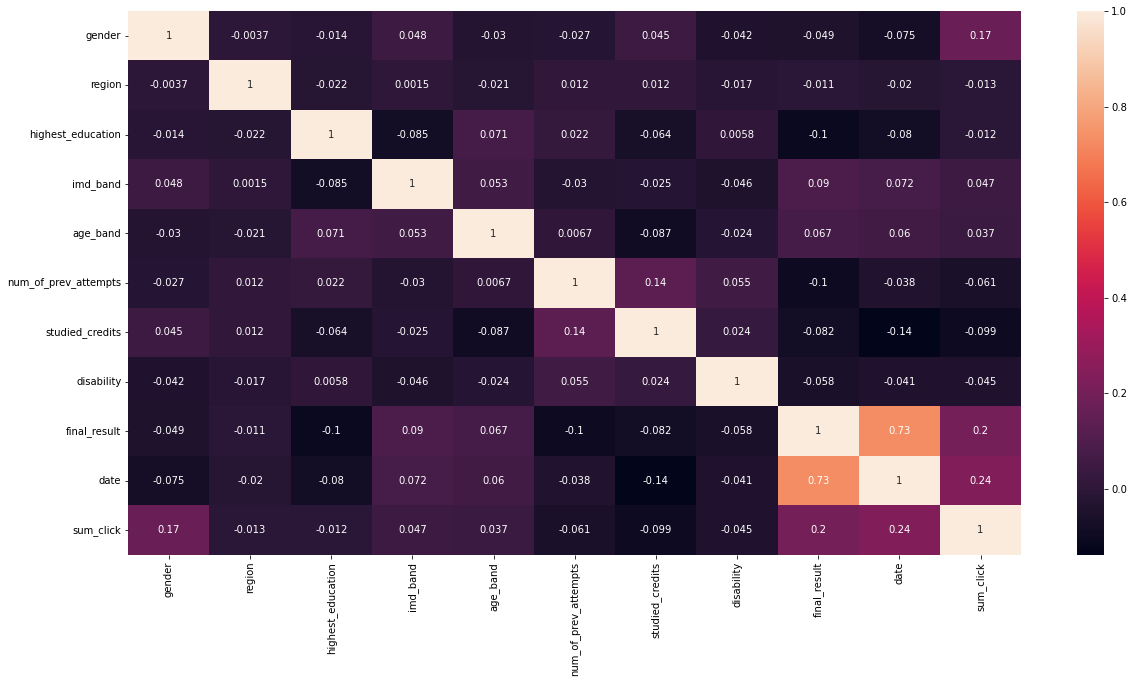

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True);

In [43]:
#y = final_df["final_result"]
#X = final_df.drop("final_result", axis = 1)

In [44]:
#y

In [45]:
#X.head()

In [46]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
# = StandardScaler().fit_transform(X)
#X

In [47]:
# split df into 80:20 train and test sets

train, test = train_test_split(final_df, test_size= 0.2, random_state = 1)

# # split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [48]:
train

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
16913,1,10,1,10,1,0,60,0,1,92.124202,1.372212
29129,0,4,0,1,1,0,30,0,1,112.499964,2.466317
6511,1,8,2,8,0,0,120,0,0,5.613636,1.431818
17161,1,6,0,9,1,0,30,0,1,99.019290,3.126730
27169,0,7,0,4,0,0,30,0,1,138.883557,2.351343
...,...,...,...,...,...,...,...,...,...,...,...
18349,1,10,2,4,0,0,60,0,0,17.258333,4.158333
16223,1,1,0,8,0,0,60,1,1,91.560270,1.326313
21450,1,4,0,0,0,0,60,0,1,100.783004,2.853025
18946,1,8,2,8,1,0,60,0,1,105.834296,4.647209


In [49]:
def format_output(data):
  final_result = data.pop("final_result")
  final_result = np.array(final_result)

  studied_credits = data.pop("studied_credits")
  studied_credits = np.array(studied_credits)

  return (studied_credits, final_result)

In [50]:
# # format the output of the train set
train_Y = format_output(train)

# # format the output of the val set
val_Y = format_output(val)
    
# # format the output of the test set
test_Y = format_output(test)

In [51]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [52]:
# # normalize the train set
norm_train_X = norm(train)
    
# # normalize the val set
norm_val_X = norm(val)
    
# # normalize the test set
norm_test_X = norm(test)

In [53]:
input_shape = norm_train_X.shape[1]
input_shape

9

In [54]:
def base_model(inputs):
  x = Dense(128, activation = 'relu')(inputs)
  x = Dense(128, activation = 'relu')(x)

  return x

In [55]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    studied_credits = Dense(units='1', name='studied_credits')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    final_result = Dense(units='1', activation='sigmoid', name='final_result')(x)

    # define the model using the input and output layers
    model = Model(inputs= inputs, outputs = [studied_credits, final_result])

    return model

In [56]:
inputs = tf.keras.layers.Input(shape=(input_shape,))
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
              loss = {'final_result' : 'binary_crossentropy',
                      'studied_credits' : 'mean_squared_error'
                     },
              metrics = {'final_result' : 'accuracy',
                         'studied_credits': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

In [57]:
history = model.fit(norm_train_X, train_Y,
                    epochs = 150,
                    validation_data = (norm_val_X, val_Y))

Epoch 1/150
549/549 [==============================] - 2s 2ms/step - loss: 4995.6494 - studied_credits_loss: 4994.9473 - final_result_loss: 0.7016 - studied_credits_root_mean_squared_error: 70.6749 - final_result_accuracy: 0.5376 - val_loss: 3805.6741 - val_studied_credits_loss: 3804.9846 - val_final_result_loss: 0.6891 - val_studied_credits_root_mean_squared_error: 61.6846 - val_final_result_accuracy: 0.5636
Epoch 2/150
549/549 [==============================] - 1s 2ms/step - loss: 2380.6650 - studied_credits_loss: 2379.9939 - final_result_loss: 0.6706 - studied_credits_root_mean_squared_error: 48.7852 - final_result_accuracy: 0.6152 - val_loss: 1157.5652 - val_studied_credits_loss: 1156.9125 - val_final_result_loss: 0.6530 - val_studied_credits_root_mean_squared_error: 34.0134 - val_final_result_accuracy: 0.6610
Epoch 3/150
549/549 [==============================] - 1s 2ms/step - loss: 912.0828 - studied_credits_loss: 911.4443 - final_result_loss: 0.6386 - studied_credits_root_mean_s

Epoch 21/150
549/549 [==============================] - 1s 2ms/step - loss: 767.5415 - studied_credits_loss: 767.1293 - final_result_loss: 0.4124 - studied_credits_root_mean_squared_error: 27.6971 - final_result_accuracy: 0.8450 - val_loss: 760.8690 - val_studied_credits_loss: 760.4677 - val_final_result_loss: 0.4014 - val_studied_credits_root_mean_squared_error: 27.5766 - val_final_result_accuracy: 0.8556
Epoch 22/150
549/549 [==============================] - 1s 2ms/step - loss: 766.1862 - studied_credits_loss: 765.7794 - final_result_loss: 0.4068 - studied_credits_root_mean_squared_error: 27.6727 - final_result_accuracy: 0.8456 - val_loss: 759.2498 - val_studied_credits_loss: 758.8505 - val_final_result_loss: 0.3996 - val_studied_credits_root_mean_squared_error: 27.5472 - val_final_result_accuracy: 0.8485
Epoch 23/150
549/549 [==============================] - 1s 2ms/step - loss: 764.9254 - studied_credits_loss: 764.5215 - final_result_loss: 0.4042 - studied_credits_root_mean_square

Epoch 41/150
549/549 [==============================] - 1s 2ms/step - loss: 750.9871 - studied_credits_loss: 750.6211 - final_result_loss: 0.3657 - studied_credits_root_mean_squared_error: 27.3975 - final_result_accuracy: 0.8675 - val_loss: 746.3671 - val_studied_credits_loss: 746.0059 - val_final_result_loss: 0.3610 - val_studied_credits_root_mean_squared_error: 27.3131 - val_final_result_accuracy: 0.8699
Epoch 42/150
549/549 [==============================] - 1s 2ms/step - loss: 750.4493 - studied_credits_loss: 750.0848 - final_result_loss: 0.3643 - studied_credits_root_mean_squared_error: 27.3877 - final_result_accuracy: 0.8672 - val_loss: 746.4529 - val_studied_credits_loss: 746.0918 - val_final_result_loss: 0.3609 - val_studied_credits_root_mean_squared_error: 27.3147 - val_final_result_accuracy: 0.8781
Epoch 43/150
549/549 [==============================] - 1s 2ms/step - loss: 749.7551 - studied_credits_loss: 749.3919 - final_result_loss: 0.3629 - studied_credits_root_mean_square

Epoch 61/150
549/549 [==============================] - 1s 2ms/step - loss: 741.9016 - studied_credits_loss: 741.5570 - final_result_loss: 0.3433 - studied_credits_root_mean_squared_error: 27.2315 - final_result_accuracy: 0.8725 - val_loss: 740.0633 - val_studied_credits_loss: 739.7246 - val_final_result_loss: 0.3388 - val_studied_credits_root_mean_squared_error: 27.1979 - val_final_result_accuracy: 0.8763
Epoch 62/150
549/549 [==============================] - 1s 2ms/step - loss: 741.4687 - studied_credits_loss: 741.1262 - final_result_loss: 0.3424 - studied_credits_root_mean_squared_error: 27.2236 - final_result_accuracy: 0.8721 - val_loss: 738.6107 - val_studied_credits_loss: 738.2729 - val_final_result_loss: 0.3378 - val_studied_credits_root_mean_squared_error: 27.1712 - val_final_result_accuracy: 0.8765
Epoch 63/150
549/549 [==============================] - 1s 2ms/step - loss: 741.1707 - studied_credits_loss: 740.8293 - final_result_loss: 0.3413 - studied_credits_root_mean_square

Epoch 81/150
549/549 [==============================] - 1s 2ms/step - loss: 735.3914 - studied_credits_loss: 735.0648 - final_result_loss: 0.3262 - studied_credits_root_mean_squared_error: 27.1121 - final_result_accuracy: 0.8752 - val_loss: 736.1802 - val_studied_credits_loss: 735.8591 - val_final_result_loss: 0.3209 - val_studied_credits_root_mean_squared_error: 27.1267 - val_final_result_accuracy: 0.8777
Epoch 82/150
549/549 [==============================] - 1s 2ms/step - loss: 735.0603 - studied_credits_loss: 734.7341 - final_result_loss: 0.3257 - studied_credits_root_mean_squared_error: 27.1060 - final_result_accuracy: 0.8747 - val_loss: 736.6208 - val_studied_credits_loss: 736.3007 - val_final_result_loss: 0.3200 - val_studied_credits_root_mean_squared_error: 27.1349 - val_final_result_accuracy: 0.8777
Epoch 83/150
549/549 [==============================] - 1s 2ms/step - loss: 735.0245 - studied_credits_loss: 734.6991 - final_result_loss: 0.3252 - studied_credits_root_mean_square

Epoch 101/150
549/549 [==============================] - 1s 2ms/step - loss: 730.5739 - studied_credits_loss: 730.2523 - final_result_loss: 0.3213 - studied_credits_root_mean_squared_error: 27.0232 - final_result_accuracy: 0.8749 - val_loss: 735.3680 - val_studied_credits_loss: 735.0523 - val_final_result_loss: 0.3156 - val_studied_credits_root_mean_squared_error: 27.1118 - val_final_result_accuracy: 0.8786
Epoch 102/150
549/549 [==============================] - 1s 2ms/step - loss: 730.5354 - studied_credits_loss: 730.2145 - final_result_loss: 0.3204 - studied_credits_root_mean_squared_error: 27.0225 - final_result_accuracy: 0.8758 - val_loss: 736.4601 - val_studied_credits_loss: 736.1440 - val_final_result_loss: 0.3160 - val_studied_credits_root_mean_squared_error: 27.1320 - val_final_result_accuracy: 0.8779
Epoch 103/150
549/549 [==============================] - 1s 2ms/step - loss: 730.6114 - studied_credits_loss: 730.2906 - final_result_loss: 0.3209 - studied_credits_root_mean_squ

Epoch 121/150
549/549 [==============================] - 1s 2ms/step - loss: 727.5529 - studied_credits_loss: 727.2328 - final_result_loss: 0.3202 - studied_credits_root_mean_squared_error: 26.9673 - final_result_accuracy: 0.8761 - val_loss: 735.9468 - val_studied_credits_loss: 735.6315 - val_final_result_loss: 0.3156 - val_studied_credits_root_mean_squared_error: 27.1225 - val_final_result_accuracy: 0.8811
Epoch 122/150
549/549 [==============================] - 1s 2ms/step - loss: 727.2009 - studied_credits_loss: 726.8809 - final_result_loss: 0.3202 - studied_credits_root_mean_squared_error: 26.9607 - final_result_accuracy: 0.8759 - val_loss: 735.3503 - val_studied_credits_loss: 735.0353 - val_final_result_loss: 0.3152 - val_studied_credits_root_mean_squared_error: 27.1115 - val_final_result_accuracy: 0.8809
Epoch 123/150
549/549 [==============================] - 1s 2ms/step - loss: 727.1464 - studied_credits_loss: 726.8267 - final_result_loss: 0.3200 - studied_credits_root_mean_squ

Epoch 141/150
549/549 [==============================] - 1s 2ms/step - loss: 724.7339 - studied_credits_loss: 724.4142 - final_result_loss: 0.3202 - studied_credits_root_mean_squared_error: 26.9149 - final_result_accuracy: 0.8756 - val_loss: 735.4357 - val_studied_credits_loss: 735.1198 - val_final_result_loss: 0.3157 - val_studied_credits_root_mean_squared_error: 27.1131 - val_final_result_accuracy: 0.8800
Epoch 142/150
549/549 [==============================] - 1s 2ms/step - loss: 724.4092 - studied_credits_loss: 724.0892 - final_result_loss: 0.3199 - studied_credits_root_mean_squared_error: 26.9089 - final_result_accuracy: 0.8766 - val_loss: 735.7271 - val_studied_credits_loss: 735.4117 - val_final_result_loss: 0.3157 - val_studied_credits_root_mean_squared_error: 27.1185 - val_final_result_accuracy: 0.8793
Epoch 143/150
549/549 [==============================] - 1s 2ms/step - loss: 724.3012 - studied_credits_loss: 723.9810 - final_result_loss: 0.3202 - studied_credits_root_mean_squ

In [58]:
loss, studied_credits_loss, final_result_loss, studied_credits_rmse, final_result_accuracy = model.evaluate(x = norm_val_X, y = val_Y) 

138/138 [==============================] - 0s 1ms/step - loss: 735.0375 - studied_credits_loss: 734.7205 - final_result_loss: 0.3171 - studied_credits_root_mean_squared_error: 27.1057 - final_result_accuracy: 0.8829


In [59]:
predictions = model.predict(norm_test_X)

172/172 [==============================] - 0s 1ms/step


In [83]:
studied_credits_pred = predictions[0]
final_result_pred = predictions[1]
final_result_pred, studied_credits_pred.max(), studied_credits_pred.mean()

(array([[0.04615799],
        [0.06568288],
        [0.9171275 ],
        ...,
        [0.03814054],
        [0.06434557],
        [0.00748766]], dtype=float32),
 133.36906,
 71.38117)

In [73]:
def plot_metrics(history,metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='r',label='val_' + metric_name)
    plt.legend()
    plt.show();


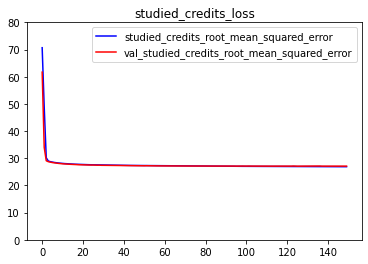

In [78]:
plot_metrics(history, 'studied_credits_root_mean_squared_error', 'studied_credits_loss', ylim=80)

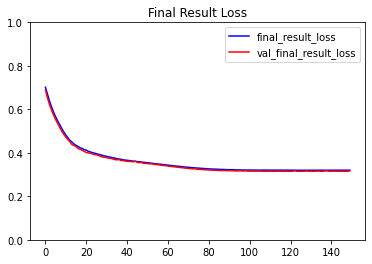

In [80]:
plot_metrics(history, 'final_result_loss', 'Final Result Loss', ylim=1)